In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# The issue of data preprocessing

Data preprocessing is a common practice in almost every real-world data-science application.

In the context of supervised machine-learning this apparently harmless initial procedure can lead to severe overfitting, hence overoptmistic estimation of the prediction error. Let's make an example.

## 1. One-dimensional linear regression
Let's create a data set with $n$ samples $\{x_i,y_i\}_{i=1}^n$ with linear input-output relationship $f(x_i)=y_i = a x_i + b$; in order to make our example more realistic, let's also add some random Gaussian noise $\varepsilon\sim\mathcal{N}(0,\sigma^2)$.

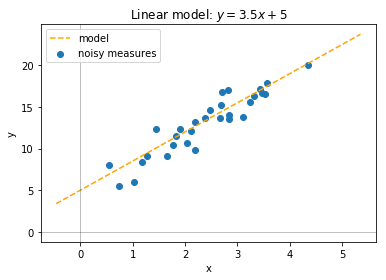

In [2]:
np.random.seed(42)  # fix random seed for reproducibility

n = 30  # number of samples
d = 1    # dimensionality of each sample

a = 3.5  # slope
b = 5    # intercept
f = lambda x: a*x+b  # linear model

sigma2 = 1.5  # noise variance
noise = sigma2*np.random.randn(n,1)

X_offset = 2.5  # data offset
X = X_offset + np.random.randn(n,d)  # random input
y = f(X) + noise # noisy output

xaxis = np.linspace(min(X)-1, max(X)+1, 10)

plt.plot(xaxis, f(xaxis), linestyle='dashed', color='orange', label='model')
plt.scatter(X, y, label='noisy measures')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.axvline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.legend(loc=2)
plt.title(r'Linear model: $y = {} x + {}$'.format(a,b));

The aim of linear regression is to infer the values of $a$ and $b$ of the input linear model from some noisy measurements. In this synthetic example we know exactly which is the noise level $\varepsilon$, let's inspect its mean absolute value.

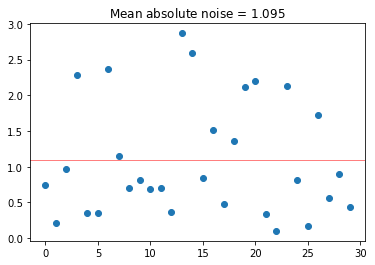

In [3]:
mean_abs_noise = np.mean(np.abs(noise))
plt.plot(np.abs(noise), 'o')
plt.axhline(mean_abs_noise, xaxis[0], xaxis[-1], linestyle='solid', color='red', linewidth=1, alpha=0.5)
plt.title(r'Mean absolute noise = ${:2.3f}$'.format(mean_abs_noise));

So, best case scenario, the mean absolute error of our linear regression algorithm can reach this value.

In this simple example, we can either fit a linear model with intercept or to *preprocess* our measures (by simple recentering) and then fit a linear model without intercept (*i.e.*, with $b=0$). Let's see it in practice.

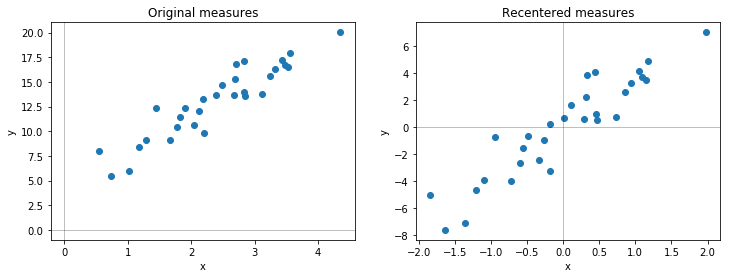

In [4]:
y_pp = y - np.mean(y)
X_pp = X - np.mean(X)

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.axvline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.title('Original measures')

plt.subplot(122)
plt.scatter(X_pp, y_pp)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.axvline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.title('Recentered measures');

After this preprocessing step, let's split our dataset in two chunks, namely, training and test set.

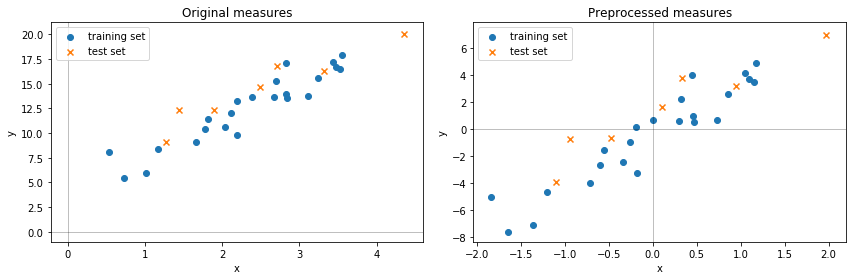

In [5]:
n_test = n // 4  # arbitrary size of the test set

X_ts, y_ts = X[:n_test,:], y[:n_test]
X_tr, y_tr = X[n_test:,:], y[n_test:]

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_tr, y_tr, label='training set')
plt.scatter(X_ts, y_ts, label='test set', marker='x')
plt.axhline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.axvline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.title('Original measures')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2);

X_ts_pp, y_ts_pp = X_pp[:n_test,:], y_pp[:n_test]
X_tr_pp, y_tr_pp = X_pp[n_test:,:], y_pp[n_test:]

plt.subplot(122)
plt.scatter(X_tr_pp, y_tr_pp, label='training set')
plt.scatter(X_ts_pp, y_ts_pp, label='test set', marker='x')
plt.axhline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.axvline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.title('Preprocessed measures')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.tight_layout();

Very good, we can now fit the two linear models on the corresponding training set and estimating the error on the mean absolute error on the test set.

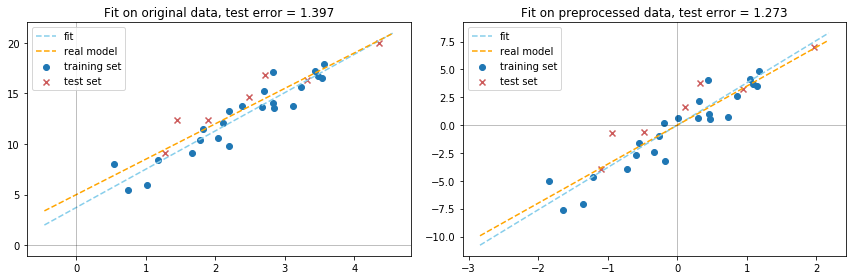

In [6]:
# Model with intercept
lr_b = LinearRegression(fit_intercept=True)
lr_b.fit(X_tr, y_tr)
y_pred = lr_b.predict(X_ts)
avg_pred_err = np.mean(np.abs(y_pred - y_ts))

plt.figure(figsize=(12,4))
xaxis = np.linspace(min(X_tr)-1, max(X_tr)+1, 10)
plt.subplot(121)
plt.scatter(X_tr, y_tr, label='training set')
plt.scatter(X_ts, y_ts, label='test set', marker='x', c='indianred')
plt.plot(xaxis, lr_b.predict(xaxis[:,None]), linestyle='dashed', color='skyblue', label='fit')
plt.plot(xaxis, f(xaxis), linestyle='dashed', color='orange', label='real model')
plt.axhline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.axvline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.title('Fit on original data, test error = {:2.3f}'.format(avg_pred_err))
plt.legend(loc=2);

# Model without intercept
lr_no_b = LinearRegression(fit_intercept=False)
lr_no_b.fit(X_tr_pp, y_tr_pp)
y_pred_pp = lr_no_b.predict(X_ts_pp)
avg_pred_err_pp = np.mean(np.abs(y_pred_pp - y_ts_pp))

plt.subplot(122)
xaxis_pp = np.linspace(min(X_tr_pp)-1, max(X_tr_pp)+1, 10)
plt.scatter(X_tr_pp, y_tr_pp, label='training set')
plt.scatter(X_ts_pp, y_ts_pp, label='test set', marker='x', c='indianred')
plt.plot(xaxis_pp, lr_no_b.predict(xaxis_pp[:,None]), linestyle='dashed', color='skyblue', label='fit')
plt.plot(xaxis_pp, f(xaxis_pp)-b, linestyle='dashed', color='orange', label='real model')
plt.axhline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.axvline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.title('Fit on preprocessed data, test error = {:2.3f}'.format(avg_pred_err_pp))
plt.legend(loc=2)
plt.tight_layout();

At a first glance, we may think that our preprocessing step has *increased* the predictive power of our linear fitting procedure. Is it legit? Or something fishy is going on here? As this is just a synthetic case, we can easily check it out.

Let's generate a new set of data and let's see which model is performing better. This will be a real *out of sample* test. In order to compare the performance of the two model, we need to *preprocess* the data **the same way** they were preprocessed in the training step.

In [7]:
np.random.seed(42)  # fix random seed for reproducibility

n_new = 100
X_new = X_offset + np.random.randn(n_new,d)
y_new = f(X_new) + sigma2*np.random.randn(n_new,1)

y_new_pp = y_new - np.mean(y)  # we are using the previous set of data
X_new_pp = X_new - np.mean(X)  # to preprocess the new one to make safe comparisons

avg_pred_err = np.mean(np.abs(lr_b.predict(X_new) - y_new))
avg_pred_err_pp = np.mean(np.abs(lr_no_b.predict(X_new_pp) - y_new_pp))

print("Prediction error on a new set of data\n - no preprocessing: {:2.3f}\n - preprocessing {:2.3f}".format(avg_pred_err, avg_pred_err_pp))

Prediction error on a new set of data
 - no preprocessing: 1.296
 - preprocessing 1.216


The model trained on original data is performing better now! So, is data preprocessing an overfitting-prone procedure? Is it to avoid as it decreases the generalization properties of the trained model?

Of course not.

What we did wrong on the previous pipeline was simply the order of the operations. In general, performing any data preprocessing strategy **before** splitting your data in training/test set is **a very bad idea**. This will give you the impression of increasing your prediction power, but actually it will just overfit your training set.

In the context of data recentering followed by linear regression this phenomenon is crucial. The intercept $b$ is basically just the average value of the ouput $y$. In other words, sneaking part of the test set into the training phase, you are giving for free a model parameter out of two (slope $a$ and intercept $b$).

Let's see a correct way of performing data preprocessing followed by a learning step.

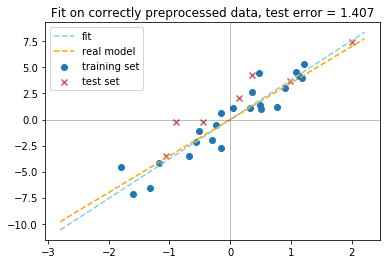

In [8]:
X_tr_avg = np.mean(X_tr)  # estimate the average of the training data
y_tr_avg = np.mean(y_tr)

X_tr_pp2 = X_tr - X_tr_avg  # preprocess training data
y_tr_pp2 = y_tr - y_tr_avg
X_ts_pp2 = X_ts - X_tr_avg  # preprocess test data
y_ts_pp2 = y_ts - y_tr_avg

# Model without intercept
lr_no_b2 = LinearRegression(fit_intercept=False)
lr_no_b2.fit(X_tr_pp2, y_tr_pp2)
y_pred_pp2 = lr_no_b.predict(X_ts_pp2)
avg_pred_err_pp2 = np.mean(np.abs(y_pred_pp2 - y_ts_pp2))

xaxis_pp2 = np.linspace(min(X_tr_pp2)-1, max(X_tr_pp2)+1, 10)
plt.scatter(X_tr_pp2, y_tr_pp2, label='training set')
plt.scatter(X_ts_pp2, y_ts_pp2, label='test set', marker='x', c='indianred')
plt.plot(xaxis_pp2, lr_no_b2.predict(xaxis_pp2[:,None]), linestyle='dashed', color='skyblue', label='fit')
plt.plot(xaxis_pp2, f(xaxis_pp2)-b, linestyle='dashed', color='orange', label='real model')
plt.axhline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.axvline(0, xaxis[0], xaxis[-1], linestyle='solid', color='k', linewidth=0.5, alpha=0.5)
plt.title('Fit on correctly preprocessed data, test error = {:2.3f}'.format(avg_pred_err_pp2))
plt.legend(loc=2);

As we can see, the test error in this case is higher than before on the few data provided. Let's try again the out-of-sample test.

In [9]:
y_new_pp = y_new - y_tr_avg  # we are using the previous set of data
X_new_pp = X_new - X_tr_avg  # to preprocess the new one to make safe comparisons

avg_pred_err2 = np.mean(np.abs(lr_no_b2.predict(X_new_pp) - y_new_pp))
print("Prediction error on a new set of data after legit preprocessing: {:2.3f}".format(avg_pred_err2))

Prediction error on a new set of data after legit preprocessing: 1.296


As we can see everything worked out as expected. In the next example we will observe this phenomenon in a real-world scenario.

## 2. Boston house-prices regression with Multi-layer Perceptron

First of all, let's load and inspect the Boston house-prices dataset.

In [25]:
from sklearn import preprocessing
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [26]:
X, y = load_boston(return_X_y=True)

print("Input data matrix X:\n- {} samples in {} dimensions".format(*X.shape))
print("- input data range [{:2.1f}, {:2.1f}]".format(np.max(X), np.min(X)))
print("- average input: [{:2.1f}, {:2.1f}, {:2.1f}, ...]".format(*np.mean(X, axis=0)[:3]))
print("\nHouse prices y:\n- {} samples in 1 dimension".format(*y.shape))
print("- labels range [{:2.1f}, {:2.1f}]".format(np.max(y), np.min(y)))
print("- average price {:2.1f}".format(np.mean(y)))

Input data matrix X:
- 506 samples in 13 dimensions
- input data range [711.0, 0.0]
- average input: [3.6, 11.4, 11.1, ...]

House prices y:
- 506 samples in 1 dimension
- labels range [50.0, 5.0]
- average price 22.5


Now let's split the dataset in learning vs out-of-sample sets.

In [27]:
X_learning, X_oos, y_learning, y_oos = train_test_split(X, y, test_size=0.5, random_state=42)

print("Learning data matrix:\n- {} samples in {} dimensions".format(*X_learning.shape))
print("- input data range [{:2.1f}, {:2.1f}]".format(np.max(X_learning), np.min(X_learning)))
print("- average input: [{:2.1f}, {:2.1f}, {:2.1f}, ...]".format(*np.mean(X_learning, axis=0)[:3]))
print("\nLearning House prices y:\n- {} samples in 1 dimension".format(*y_learning.shape))
print("- labels range [{:2.1f}, {:2.1f}]".format(np.max(y_learning), np.min(y_learning)))
print("- average price {:2.1f}".format(np.mean(y_learning)))

Learning data matrix:
- 253 samples in 13 dimensions
- input data range [711.0, 0.0]
- average input: [3.4, 12.3, 11.1, ...]

Learning House prices y:
- 253 samples in 1 dimension
- labels range [50.0, 6.3]
- average price 22.7


As we can see, estimating the mean of the entire dataset or just of the training set is a bit different. Now let's build two regression pipeline. The first will overfit the training data and the second will return legit predictions.

In [28]:
# Overfitting-prone pipeline
# 1. Preprocessing
pp = preprocessing.StandardScaler()
X_learning_pp = pp.fit_transform(X_learning)

ppy = preprocessing.StandardScaler()
y_learning_pp = ppy.fit_transform(y_learning)

# 2. Training/test split
X_tr_pp, X_ts_pp, y_tr, y_ts = train_test_split(X_learning_pp, y_learning_pp, test_size=0.25, random_state=42)

# 3. Model fitting
mlp = MLPRegressor(hidden_layer_sizes=[100], random_state=42)
mlp.fit(X_tr_pp, y_tr)

# 4. Training/test/out-of-sample errors evaluation
tr_err = mean_absolute_error(ppy.inverse_transform(mlp.predict(X_tr_pp)), ppy.inverse_transform(y_tr))
ts_err = mean_absolute_error(ppy.inverse_transform(mlp.predict(X_ts_pp)), ppy.inverse_transform(y_ts))
oos_err = mean_absolute_error(ppy.inverse_transform(mlp.predict(pp.transform(X_oos))), y_oos)
print("Overfitting pipeline:\n- training error {:2.3f}\n- test error {:2.3f}".format(tr_err, ts_err))
print("- out-of-sample error {:2.3f}".format(oos_err))

Overfitting pipeline:
- training error 1.644
- test error 2.358
- out-of-sample error 2.591


In [30]:
# Legit pipeline
# 1. Training/test split
X_tr, X_ts, y_tr, y_ts = train_test_split(X_learning, y_learning, test_size=0.25, random_state=42)

# 2. Preprocessing
pp = preprocessing.StandardScaler()
X_tr_pp = pp.fit_transform(X_tr)

ppy = preprocessing.StandardScaler()
y_tr_pp = ppy.fit_transform(y_tr)

# 3. Model fitting
mlp = MLPRegressor(hidden_layer_sizes=[100], random_state=42)
mlp.fit(X_tr_pp, y_tr_pp)

# 4. Training/test/out-of-sample errors evaluation
tr_err = mean_absolute_error(ppy.inverse_transform(mlp.predict(X_tr_pp)), ppy.inverse_transform(y_tr_pp))
ts_err = mean_absolute_error(ppy.inverse_transform(mlp.predict(pp.transform(X_ts))), y_ts)
oos_err = mean_absolute_error(ppy.inverse_transform(mlp.predict(pp.transform(X_oos))), y_oos)
print("Legit pipeline:\n- training error {:2.3f}\n- test error {:2.3f}".format(tr_err, ts_err))
print("- out-of-sample error {:2.3f}".format(oos_err))

Legit pipeline:
- training error 1.647
- test error 2.390
- out-of-sample error 2.587


Once again, we obtain a lower the out-of-sample error with the model that perform preprocessing only the training data.

So, in this realistic case as well a simple out-of-sample test showed that preprocessing the dataset before the training/test splitting can lead to an overoptimistic test error estimation.

## 3. Take home message

1. **Preprocessing** is **not** a completely harmless procedure.
2. **Never** preprocess your data **before** the training/test split, do the opposite instead.
3. As long as it's possible, keep an **out-of-sample** test apart and use it to estimate the generalization error at the end of your learning pipeline.
4. **Be sospicious** of good results, don't forget to check if they come from a legit pipeline or if you are accidentally sneaking some test data in the training step.